<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN (K-nearest neighbor)

### HW 4 การสร้าง Function KNN โดยที่ไม่ใช้ command KNN (Creating a KNN function without using the KNN import)

จากการใช้ข้อมูล data iris

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import numpy as np

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris['DESCR'][:500]+"\n....")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

....


In [5]:
test_data0 = iris['data'][:5,:]
test_data1 = iris['data'][50:55,:]
test_data2 = iris['data'][100:105,:]

train_data0 = iris['data'][5:50,:]
train_data1 = iris['data'][55:100,:]
train_data2 = iris['data'][105:150,:]

In [6]:
test_data = np.concatenate([test_data0,test_data1,test_data2])
train_data = np.concatenate([train_data0,train_data1,train_data2])

In [7]:
test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]

In [8]:
test_labels = np.concatenate([test_label_0, test_label_1, test_label_2])
train_labels = np.concatenate([train_label_0, train_label_1, train_label_2])

##HW4

Write your own KNN algorithn using sorting fuction from HW2



```
(the function should take 3 parameters:

1.training data

2.testdata

3.K)
```



In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Calculate Distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

#Find how long a new data to data_train
def find_k_nearest_indices(distances, k):
    nearest_indices = []
    for i in range(k):
        min_distance = float("inf")
        min_index = -1
        for j in range(len(distances)):
            if j not in nearest_indices:
                if distances[j] < min_distance:
                    min_distance = distances[j]
                    min_index = j
        nearest_indices.append(min_index)
    return nearest_indices

#main function knn
def knn(train_data, test_data, k):
    test_labels = []
    for test_point in test_data:
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]

        # Find the k-nearest neighbors
        nearest_indices = find_k_nearest_indices(distances, k)

        # Determine the most common class among the k-nearest neighbors
        nearest_labels = [train_labels[i] for i in nearest_indices]
        predicted_label = np.bincount(nearest_labels).argmax()
        test_labels.append(predicted_label)

    return np.array(test_labels)

In [10]:
k = 3
test_predictions = knn(train_data, test_data, k)
test_predictions

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

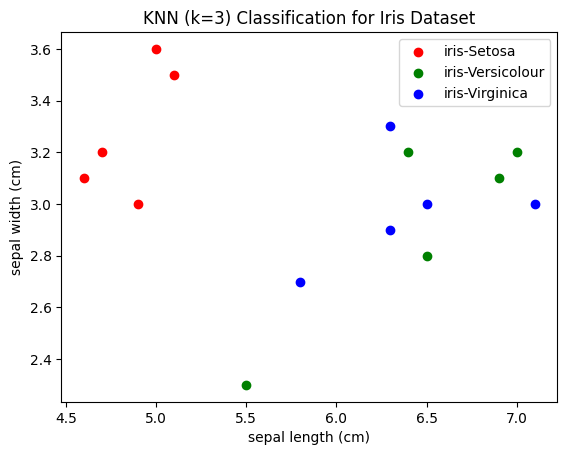

In [11]:
class_names = ['iris-Setosa', 'iris-Versicolour', 'iris-Virginica']
class_colors = ['r', 'g', 'b']

for i in range(len(class_names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 0], test_data[class_indices, 1], label=class_names[i], c=class_colors[i])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'KNN (k={k}) Classification for Iris Dataset')


plt.legend()
plt.show()

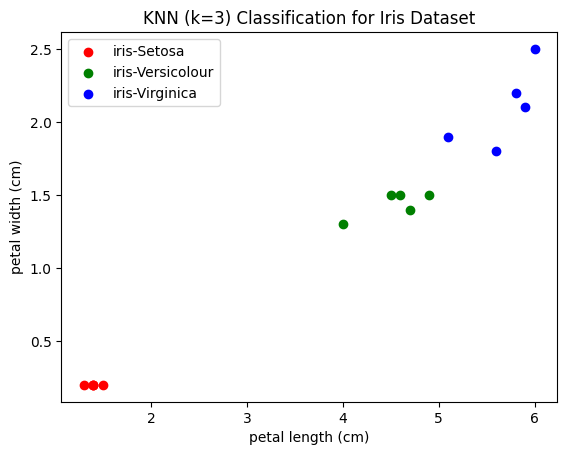

In [12]:
for i in range(len(class_names)):
    class_indices = np.where(test_labels == i)[0]
    plt.scatter(test_data[class_indices, 2], test_data[class_indices, 3], label=class_names[i], c=class_colors[i])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'KNN (k={k}) Classification for Iris Dataset')


plt.legend()
plt.show()

---

วิธีที่ถูกต้อง

In [13]:
def knn(training_data, test_data, k):
    predictions = []

    # Outer looping: calculate each test point [i]
    for test_point in test_data:
        # Calculate distances between test_point and all training data points
        distances = []
        for train_point in training_data:
            # Using euclidean_distance function
            distance = euclidean_distance(test_point, train_point[:-1])
            distances.append((train_point, distance))

        # Sort distances using Bubble Sort
        for i in range(len(distances) - 1):
            for j in range(len(distances) - 1 - i):
                if distances[j][1] > distances[j + 1][1]:
                    distances[j], distances[j + 1] = distances[j + 1], distances[j]

        # Get the K nearest neighbors
        k_neighbors = distances[:k]

        # Count the class occurrences in the KNN
        class_count = {}
        for neighbor in k_neighbors:
            label = neighbor[0][-1]
            if label in class_count:
                class_count[label] += 1
            else:
                class_count[label] = 1

        # Predict the class label with the highest count
        prediction = max(class_count, key=class_count.get)
        predictions.append(prediction)

    return predictions

---